# QR dekompozicija

Sadržaj:
- [Gram-Šmitov algoritam](#Gram-Šmitov-algoritam)
- [Implementacija](#Implementacija)
- [Operacijska složenost Gram-Šmitovog algoritma](#Operacijska-složenost-Gram-Šmitovog-algoritma)
- [Pivot strategija Gram-Šmitovog algoritma](#Pivot-strategija-Gram-Šmitovog-algoritma)

QR dekompozicija matrice $A$ predstavlja postupak razlaganje matrice $A$ u proizvod jedne ortogonalne $(Q)$ i jedne trougaone matrice $(R).$ QR dekompozicija punog ranga redukuje tihe kolone matrice $Q$ na osnovu nula vrsta matrice $R.$ Takva QR dekompozicija ima matricu $Q$ sa ortonormiranim kolonama (ortonormirana baza prostora kolona matrice $A$) i trougaonu matricu $R$ punog ranga vrsta.  Postoji nekoliko načina za sprovođenje ove dekompozicije. Mi ćemo predstviti QR dekompoziciju kao posledicu Gram-Šmitovog algoritma. Ovaj algoritam za rezultat daje redukovanu QR dekompoziciju, tj. QR dekompoziciju punog ranga. 

In [1]:
import numpy as np
from timeit import default_timer as timer
import numpy.random as rndm

## Gram-Šmitov algoritam

Polazeći od skupa vektora $v_0,v_1,\dots,v_n,$ Gram-Šmitov algoritam u svakom koraku generiše jedan nov vektor $u_i$ ortogonalan na prethodno generisane vektore $u_0,u_1,\dots,u_{i-1}.$ Tom prilikom čuvaju se potprostori generisani ovim vektorima
\begin{align}
 	\mathcal{L}(v_0)&=\mathcal{L}(u_0),\\
 	\mathcal{L}(v_0,v_1)&=\mathcal{L}(u_0,u_1),\\
 	\mathcal{L}(v_0,v_1,v_2)&=\mathcal{L}(u_0,u_1,u_2),\\
 	&\ \vdots\\
 	\mathcal{L}(v_0,v_1,\dots,v_{i-1})&=\mathcal{L}(u_0,u_1,\dots,u_{i-1}),\\
    &\ \vdots
 \end{align}

Kada je polazni skup vektora $v_0,v_1,\dots,v_n$ linearno nezavisan, Gram-Šmitov algoritam vraća $n+1$ ortogonalnih vektora $u_0,u_1,\dots,u_n.$ Ukoliko polazni skup vektora $v_0,v_1,\dots,v_n$ nije linearno nezavisan, tada Gram-Šmitov algoritam vraća $r$ ortogonalnih vektora $u_0,u_1,\dots,u_r,$ gde je $r$ maksimalan broj linearno nezavisnih vektora u skupu $v_0,v_1,\dots,v_n.$ Prema tome $r=\dim\left(\mathcal{L}(v_0,\dots,v_n)\right).$ Normiranjem skupa ortogonalnih vektora $u_0,u_1,\dots,u_{r-1}$ dobijamo ortonormiran skup $q_0,q_1,\dots,q_{r-1}.$ 
Za generisane vektore važi
$$\mathcal{L}(v_0,\dots,v_k)=\mathcal{L}(q_0,\dots,q_k),\ \forall k=0,1,\dots,r-1.$$
U nastavku, pod Gram-Šmitovim postupkom podrazumevaćemo proces ortonormiranja skupa ulaznih vektora.

Gram-Šmitov algoritam ortonormiranja linearno nezavisnih vektora

|  |   |   |   |
|---|---|---|---|
|0. korak: |$u_0=v_0$|  |$ q_0=\dfrac{u_0}{\|u_0\|}$|
|1. korak: |$u_1=v_1-\big(q_0^Tv_1\big)q_0$|  |$ q_1=\dfrac{u_1}{\|u_1\|}$|
|2. korak:| $u_2=v_1-\big(q_0^Tv_2\big)q_0-\big(q_1^Tv_2\big)q_1$|  |$ q_2=\dfrac{u_2}{\|u_2\|}$|
|$\vdots$|   |    |
|$n-$ti korak:| $u_n=v_n-\displaystyle\sum_{k=0}^{n-1}\big(q_k^Tv_n\big)q_k$|  | $q_n=\dfrac{u_n}{\|u_n\|}$|

Primetimo da se ortogonalni vektor $u_k$ dobija u obliku
$$u_k=\|u_k\|q_k=v_k-\lambda_0q_0-\lambda_1q_1-\dots-\lambda_{k-1}q_{k-1}\in\mathcal{L}(q_0,q_1,\dots,q_{k-1},v_k).$$
Zbog toga je 
$$v_k=\lambda_0q_0+\lambda_1q_1+\dots+\lambda_{k-1}q_{k-1}+\|u_k\|q_k\in\mathcal{L}(q_0,q_1,\dots,q_k).$$

Ove jednakosti, osim što potvrđuju svojstvo održavanja lineala Gram-Šmitovim postupkom, omogućavaju prevođenje samog algoritma u proizvod dve matrice koju zovemo QR faktorizacija. 

U slučaju linearno nezavisnih vektora $v_0,v_1,\dots,v_n$ njihove Furijeove koordinate u bazi $q_0,q_1\dots,q_n$ daju:

$$\begin{array}{r@{}l@{}l@{}l}
	v_0&=(q_0^Tv_0)q_0&,&\\[4pt]
	v_1&=(q_0^Tv_1)q_0&+(q_1^Tv_1)q_1&,\\
	&\vdots&&\\
	v_n&=(q_0^Tv_n)q_0&+(q_1^Tv_1)q_2&+\dots+(q_n^Tv_n)q_n.
\end{array}$$
U matričnom obliku gornje jednakosti su:
$$\left[\begin{array}{c|c|c|c}
	\!\!\begin{array}{c}\phantom{i}\\v_0\\\phantom{i}\end{array}\!\!
	&\,v_1\,&\dots&v_n \end{array}\right]=\left[\begin{array}{c|c|c|c}
	\!\!\begin{array}{c}\phantom{i}\\q_0\\\phantom{i}\end{array}\!\!
	&\,q_1\,&\dots&q_n \end{array}\right]
    \begin{bmatrix} q_0^Tv_0&q_0^Tv_1&\dots&q_0^Tv_n\\
	0&q_1^Tv_1&\dots&q_1^Tv_n\\
	\vdots&\vdots&\ddots&\vdots\\
	0&0&\dots&q_n^Tv_n\end{bmatrix}$$ 
$$\Longleftrightarrow\ A=QR.$$

Za dijagonalne elemente matrice $R$ važi $q_k^Tv_k=\|u_k\|>0.$
Matrica $Q$ je sa kolonama koje su ortonormirana baza prostora $\mathcal{L}(v_0,v_1,\dots,v_n).$ Ukoliko su $v_k\in\mathbb{R}^{n+1}$ matrica $Q$ je ortogonalna matrica. Trougaona matrica $R$ na glavnoj dijagonali ima pozitivne elemente.

U situaciji kada Gram-Šmitov postupak primenjujemo na skup linearno zavisnih vektora $v_1,v_2,\dots,v_n,$ tada svaki vektor $v_k$ koji je linearno zavisan od prethodnih, tj. $v_k\in\mathcal{L}(q_1,\dots,q_{k-1})$  postaje nula vektor, odnosno 
$$u_k=v_k-\lambda_1q_1-\lambda_2q_2-\dots-\lambda_{k-1}q_{k-1}=\theta.$$  
U svrhe očuvanja linearne nezavisnosti izlaznog skupa vektora $u_1,u_2,\dots,u_k,$ ovakav rezultat se odbacuje iz izlaznog skupa. Na taj način Gram-Šmitov algoritam postaje i sredstvo za ispitivanje linearne nezavisnosti skupa vektora ili metod za određivanje ranga skupa vektora, tj. ranga matrice.

## Implementacija

Implementaciju QR dekompozicije sprovešćemo na način koji podržava vektorizaciju izračunavanja. Posmatranjem vrsta matrice $R$
$$A=\left[\begin{array}{c|c|c|c}
	\!\!\begin{array}{c}\phantom{i}\\v_0\\\phantom{i}\end{array}\!\!
	&\,v_1\,&\dots&v_n \end{array}\right]=\left[\begin{array}{c|c|c|c}
	\!\!\begin{array}{c}\phantom{i}\\q_0\\\phantom{i}\end{array}\!\!
	&\,q_1\,&\dots&q_n \end{array}\right]
    \begin{bmatrix} \|u_0\|&q_0^Tv_1&\dots&q_0^Tv_n\\
	0&\|u_1\|&\dots&q_1^Tv_n\\
	\vdots&\vdots&\ddots&\vdots\\
	0&0&\dots&\|u_n\|\end{bmatrix}=QR$$
vidimo da se vandijagonalni elementi mogu kreirati jednom operacijom.   
```python
    R[0,1:]=q_0^TA[:,1:]
    R[1,2:]=q_1^TA[:,2:]
```
$\qquad\qquad\vdots$
```python
    R[-2,-1]=q_n-1^TA[:,-1]
```

Osim toga, nije neophodno stalno raditi originalnim kolonama matrice $A.$ Umesto toga mogu da se koriste njihove ažurirane verzije u svakom koraku. Naime, jednakosti
$$u_k=v_k-\displaystyle\sum_{j=0}^{k-1}\big(q_j^Tv_k\big)q_j=\left(I-\displaystyle\sum_{j=0}^{k-1}q_jq_j^T\right)v_k$$
imaju ekvivalentan oblik
$$u_k=\left(I-q_{k-1}q_{k-1}^T\right)\dots\left(I-q_{1}q_{1}^T\right)\left(I-q_{0}q_{0}^T\right)v_k.$$

Zaista,
\begin{align}
\left(I-q_{1}q_{1}^T\right)\left(I-q_{0}q_{0}^T\right)&=I-q_{0}q_{0}^T-q_{1}q_{1}^T+q_{1}\underbrace{q_{1}^Tq_{0}}_0q_{0}^T
=I-q_{0}q_{0}^T-q_{1}q_{1}^T,\\
\left(I-q_{2}q_{2}^T\right)\left(I-q_{1}q_{1}^T\right)\left(I-q_{0}q_{0}^T\right)&=
\left(I-q_{2}q_{2}^T\right)\left(I-q_{0}q_{0}^T-q_{1}q_{1}^T\right)=
I-q_{0}q_{0}^T-q_{1}q_{1}^T-q_{2}q_{2}^T+q_{2}\underbrace{q_{2}^Tq_{0}}_0q_{0}^T+q_{2}\underbrace{q_{2}^Tq_{1}}_0q_{1}^T\\
&=I-q_{0}q_{0}^T-q_{1}q_{1}^T-q_{2}q_{2}^T,\\
&\vdots
\end{align}

Pokazane jednakosti sugerišu implementaciju u kojoj se kolone matrice $Q$ ažuriraju u svakom koraku. Ovakav pristup je numerički stabilniji u odnosu na polazni oblik Gram-Šmitovog postupka. To zovemo modifikacija Gram-Šmitovog algoritma. Pokazaćemo na sledećem primeru.

**Primer 1.** Odredićemo QR dekompoziciju matrice $A=\begin{bmatrix}1&-1&1\\0&0&2\\
	1&2&0\end{bmatrix}$
	koristeći Gram-Šmitov postupak ortogonalizacije.	

Gram-Šmitov postupak ortogonalizacije gradi traženu dekompoziciju $A=QR$ kroz iteracije. U svakom koraku generišu se po jedna kolona matrice $Q$ i jedna vrsta matrice $R,$ tačnije njeni nenula elementi.

Uvedimo oznake kolona matrice $A:$
$$v_0=\begin{bmatrix}1\\0\\1\end{bmatrix},\qquad 
v_1=\begin{bmatrix}-1\\0\\2\end{bmatrix},\qquad
v_2=\begin{bmatrix}1\\2\\0\end{bmatrix}.$$

In [2]:
A=np.array([[1,-1,1.],[0,0,2],[1,2,0]])
np.linalg.matrix_rank(A)

3

Kolone matrice $A$ su linearno nezavisne, pa će se QR dekompozicija sastojati od ortogonalne matrice $Q$ i regularne trougaone matrice $R.$ Primenimo Gram-Šmita. Inicijalizacija algoritma podrazumeva obezbeđivanje memorijskog prostora i početnih vrednosti matrica $Q$ i $R$ koje će se kroz korake Gram-Šmita popunjavati. 

In [3]:
R=np.zeros((3,3))
Q=np.copy(A)

Na ovaj način svi vektori koji se koriste u izračunavanju su već u matrici $Q.$

**I korak:** Određujemo prvi vektor ortonormirane baze prostora kolona

$u_0=v_0=\begin{bmatrix}1\\0\\1\end{bmatrix},\qquad\|u_0\|=\sqrt2,\qquad q_0=\dfrac{u_0}{\|u_0\|}=\dfrac{1}{\sqrt2}\begin{bmatrix}1\\0\\1\end{bmatrix}.$

In [4]:
d=np.linalg.norm(Q[:,0])  #norma vektora
Q[:,0]=Q[:,0]/d
print(Q)

[[ 0.70710678 -1.          1.        ]
 [ 0.          0.          2.        ]
 [ 0.70710678  2.          0.        ]]


Određujemo koordinate preostalih kolona matrice $A$ u odnosu na prvi vektor ortonormirane baze. Dakle, računamo $q_0^TQ[:,1:]$. Na taj način generiše se cela prva vrsta matrice $R.$
<div>
   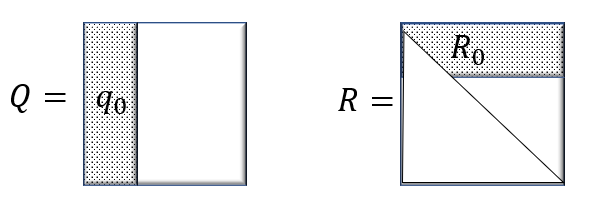  
</div>

In [5]:
R[0]=np.append(d,np.dot(Q[:,0],Q[:,1:]))
print(R)

[[1.41421356 0.70710678 0.70710678]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


Dobili smo prvu kolonu ortogonalne matrice $Q$ i prvu vrstu trougaone matrice $R:$
$\qquad Q_0=\begin{bmatrix}\dfrac{1}{\sqrt2}\\ 0 \\\dfrac{1}{\sqrt2}\end{bmatrix},\qquad
R_0=\begin{bmatrix}\sqrt{2}&\dfrac{1}{\sqrt2}&\dfrac{1}{\sqrt2}\end{bmatrix}.$

Za izračunavanje preostalih vektora $q_k$ neophodan je korak 
$$(I-q_0q_0^T)v_k,\ k>0\quad\Longleftrightarrow\quad Q[:,1:]-q_0R_0[1:].$$ 
Zbog toga prilagođavamo sadržaj preostalih kolona matrice $A.$

In [6]:
Q[:,1:]=Q[:,1:]-np.outer(Q[:,0],R[0,1:]) 
print(Q)

[[ 0.70710678 -1.5         0.5       ]
 [ 0.          0.          2.        ]
 [ 0.70710678  1.5        -0.5       ]]


Druga kolona matrice $Q$ sadrži vektor $u_1=(I-q_0q_0^T)v_1,$ a treća kolona sadrži $(I-q_0q_0^T)v_2.$

II korak: Dalja transformacija druge kolone je njeno normiranje, $q_1=\dfrac{u_1}{\|u_1\|}.$

In [7]:
d=np.linalg.norm(Q[:,1])
Q[:,1]=Q[:,1]/d
print(Q)

[[ 0.70710678 -0.70710678  0.5       ]
 [ 0.          0.          2.        ]
 [ 0.70710678  0.70710678 -0.5       ]]


Određujemo koordinate preostalih kolona matrice  $A$  u odnosu na drugi vektor ortonormirane baze. Na taj način generiše se druga vrsta matrice  $R. $
<div>
   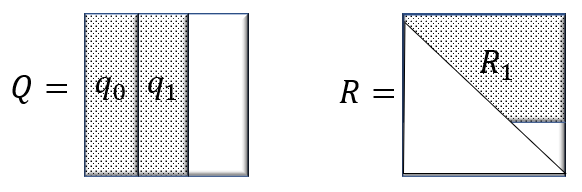  
</div>

In [8]:
R[1,1:]=np.append(d,Q[:,1]@Q[:,2:])
print(R)

[[ 1.41421356  0.70710678  0.70710678]
 [ 0.          2.12132034 -0.70710678]
 [ 0.          0.          0.        ]]


Prilagođavamo sadržaj poslednje kolone matrice $A$ za poslednji korak Gram-Šmitovog postupka, $u_2=(I-q_1q_1^T)(I-q_0q_0^T)v_k.$

In [9]:
Q[:,2:]=Q[:,2:]-np.outer(Q[:,1],R[1,2:])
print(Q)

[[ 7.07106781e-01 -7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  2.22044605e-16]]


III korak: Preostali vektor sačuvan u poslednjoj koloni matrice $Q$ potrebno je samo da se normira, $q_2=\dfrac{u_2}{\|u_2\|}.$ 

In [10]:
d=np.linalg.norm(Q[:,2])
Q[:,2]=Q[:,2]/d
R[2,2]=d 
print("R=",R)
print("Q=",Q)

R= [[ 1.41421356  0.70710678  0.70710678]
 [ 0.          2.12132034 -0.70710678]
 [ 0.          0.          2.        ]]
Q= [[ 7.07106781e-01 -7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  1.11022302e-16]]


Proverićemo dobijenu faktorizaciju množenjem.

In [11]:
print(A)
np.round(Q@R,3)

[[ 1. -1.  1.]
 [ 0.  0.  2.]
 [ 1.  2.  0.]]


array([[ 1., -1.,  1.],
       [ 0.,  0.,  2.],
       [ 1.,  2.,  0.]])

Prethodni algoritam zapisaćemo kao jednu kodnu ćeliju.

In [12]:
A=np.array([[1,-1,1.],[0,0,2],[1,2,0]])
R=np.zeros((3,3))
Q=np.copy(A)
for i in range(3):
    d=np.linalg.norm(Q[:,i])
    Q[:,i]=Q[:,i]/d
    R[i,i]=d
    if i<2:
        R[i,i+1:]=Q[:,i]@Q[:,i+1]
        Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,i+1:])
print("R=",R)
print("Q=",Q) 
print(A-Q@R)

R= [[ 1.41421356  0.70710678  0.70710678]
 [ 0.          2.12132034 -0.70710678]
 [ 0.          0.          2.        ]]
Q= [[ 7.07106781e-01 -7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01  1.11022302e-16]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [13]:
np.round(Q@Q.T,5)

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [-0.,  0.,  1.]])

## Operacijska složenost Gram-Šmitovog algoritma

Neka je $A\in\mathcal{M}_{n\times n}$ kvadratna regularna matrica čiju QR dekompoziciju Gram-Šmitovim postupkom tražimo. Kolone matrice $A$ označene su sa $a_0,a_1,\dots,a_{n-1}.$ 

Za lakše prebrojavanje operacija iskoristićemo međurezultate:
- Jedan skalarni proizvod dva vektora dimenzije $n$ troši $n$ množenja i $n-1$ sabiranja, što je ukupno $2n-1$ operacija.
- Izračunavanje norme vektora dimenzije $n$ koristi jedan skalarni proizvod vektora sa samim sobom i jedno korenovanje, što je ukupno $2n$ operacija.
- Normiranje vektora koristi izračunavanje norme i skaliranje komponenti vektora recipročnom vrednošću norme, što možemo da brojimo kao $3n$ operacija.

Operacijska složenost algoritma ogleda se u:

Poslednja iteracija Gram-Šmitovog algoritma  samo normira vektor $q_{n-1}\in\mathbb{R}^n$ - $3n$ operacija.

Sve prethodne iteracije koriste sledeće korake za $0\leq k\leq n-2:$
- Normiranje vektora $q_k\in\mathbb{R}^n$  - $3n$ operacija.
- Izračunavanje Furijeovih koeficijenata $q_k^Ta_j,\ j>k$ - broj operacija $(n-1-k)(2n-1).$
- Ažuriranje vektora $a_{k+1},\dots,a_{n-1}$ - $2n(n-1-k),\ 0\leq k<n-1.$

Jedan korak algoritma tada vredi:
$$3n+(n-1-k)(2n-1)+2n(n-1-k)=4n^2-2n+1-k(4n-1)\mbox{ operacija}.$$

In [14]:
import sympy as sym
n=sym.Symbol('n')
k=sym.Symbol('k')
sym.expand(3*n+(n-1-k)*(2*n-1)+2*n*(n-1-k))

-4*k*n + k + 4*n**2 - 2*n + 1

In [15]:
sym.simplify(3*n+(n-1-k)*(2*n-1)+2*n*(n-1-k))

-4*k*n + k + 4*n**2 - 2*n + 1

In [16]:
korak=sym.Poly(3*n+(n-1-k)*(2*n-1)+2*n*(n-1-k),k)
korak.all_coeffs()

[1 - 4*n, 4*n**2 - 2*n + 1]

In [17]:
korak=sym.Poly(3*n+(n-1-k)*(2*n-1)+2*n*(n-1-k),n)
korak.all_coeffs()

[4, -4*k - 2, k + 1]

Ukupna operacijska složenost QR dekompozicije modifikovanim Gram-Šmitovim postupkom iznosi:
\begin{align}
    3n+\displaystyle\sum_{k=0}^{n-2}\big(4n^2-2n+1-k(4n-1)\big)&{=}3n
    +\big(4n^2-2n+1\big)(n-1)-(4n-1)\displaystyle\sum_{k=0}^{n-2}k\\
    &=3n
    +\big(4n^2-2n+1\big)(n-1)-\dfrac{(4n-1)(n-2)(n-1)}{2}\\
    &=3n
    +\dfrac{n-1}{2}\big(2(4n^2-2n+1)-(4n-1)(n-2)\big)\\
    &=3n+\dfrac{n(4n^2+n-5)}{2}=\dfrac{n(4n^2+n-5+6)}{2}\\
    &=\dfrac{n(4n^2+n+1)}{2}=\mathcal{O}(2n^3)\,.
\end{align}
Modifikovani Gram-Šmitov postupak (koji koristi paralelizaciju izračunavanja) je prirodniji za implementaciju na računarima zbog kvalitetnijih izlaza koje generiše i ekonomičnije upotrebe reusrsa.

In [18]:
sym.simplify(sym.Sum(4*n*n-2*n+1-4*k*n+k,(k,0,n-2)).doit())

n*(4*n**2 + n - 5)/2

In [19]:
sym.simplify(3*n+sym.Sum(4*n*n-2*n+1-4*k*n+k,(k,0,n-2)).doit())

n*(4*n**2 + n + 1)/2

**Primer 2.** Potražićemo QR faktorizaciju matrice $A=\begin{bmatrix} 1&2&1&-1\\
	2&4&-1&3\end{bmatrix}$ sa linearno zavisnim kolonama. Na njenom primer pokazaćemo dejstvo Gram-Šmita u takvoj situaciji.

In [20]:
A=np.array([[1,2,1,-1.],[2,4,-1,3]])
np.linalg.matrix_rank(A)

2

In [21]:
R=np.zeros((2,4))
Q=np.copy(A)

In [22]:
i=0
for k in range(4):
    d=np.linalg.norm(Q[:,i])
    if d>1e-5:
        Q[:,i]=Q[:,i]/d
        R[i,k]=d
        if k<3: 
            R[i,k+1:]=Q[:,i]@Q[:,i+1:]
            Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,k+1:])
        i+=1
    else:
        Q=np.delete(Q,i,1)  #brisanje k-te kolone iz matrice Q
print(Q)
print(R)

[[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]
[[ 2.23606798  4.47213595 -0.4472136   2.23606798]
 [ 0.          0.          1.34164079 -2.23606798]]


In [23]:
Q@R-A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Primećujemo da trougaona matrica ima nulu na glavnoj dijagonali. Da bi se ovo izbeglo primenjuje se pivot strategija.

## Pivot strategija Gram-Šmitovog algoritma

Kao i sa trougaonom dekompozicijom, postupak dekompozicije daje najbolje rezultate ukoliko se kombinuje sa strategijom izbora pivota. U slučaju Gram-Šmitovog postupka u svakom koraku kolona tj. vektor koji se obrađuje bira se da bude maksimalan po normi. Nažalost, postupak određivanja pivota uglavnom bude vremenski najzahtevniji deo algoritma.

Zbog stabilnosti u izračunavanjima, tačnije da bi se izbegao eksponencijalni rast vrednosti unutar matrice, primenjuje se postupak QR faktorizacije sa izborom pivot elementa.  Cilj pivot strategije je postavljanje opadajućih vrednosti normi na dijagonalu matrice $R.$ To se postiže permutacijom kolona matrice $A$ tako da pivot kolona bude uvek vektor najveće norme među preostalim vektorima za obradu. Konačan rezultat ovakve dekompozicije je tada $AP=QR,$ tj. $A=QRP^T,$ gde je $P$ odgovarajuća permutaciona matrica, a $R$ je trougaona matrica kod koje za dijagonalne elemente važi: 
$$|r_{00}|\geq|r_{11}|\geq\dots\geq|r_{kk}|\geq\dots$$

Geometrijski posmatrano, strategija izbora pivot vektora u ortogonalnoj dekompoziciji služi da se pronađe vektor koji je 'najviše' linearno nezavisan u odnosu na prethodno generisane vektore - ima najveće odstojanje od potprostora razapetog nad prethodno generisanim vektorima. Na taj način njegovom ortogonalizacijom dobija se vektor koji je u toj iteraciji najdalje od nula-vektora. To je bitan kriterijum jer normiranjem vektora bliskog nuli dobili bi se numerički veoma nepouzdani rezultati.

U prvom koraku Gram-Šmitovog algoritma odrede se norme svih vektora kolona matrice $Q=A\in\mathcal{M}_{m\times n},$
$$Q=\left[\begin{array}{c|c|c|c}
\!\!\begin{array}{c}\phantom{i}\\a_0\\\phantom{i}\end{array}\!\!
&\,a_1\,&\dots&a_{n-1} \end{array}\right],\qquad
norme=\begin{bmatrix}\|a_0\|^2&\|a_1\|^2&\dots&\|a_{n-1}\|^2\end{bmatrix}.$$

Na osnovu indeksa najveće komponente vektora $norme$ bira se prva pivot kolona, vrši se odgovarajuća permutacija kolona matrice $Q.$ 
To ćemo zbog jednostavnosti zapisa tretirati kao prenumeraciju indeksa odgovarajućih vektora, tj. 
$$
    \left[\begin{array}{c|c|c|c}
\begin{array}{c}\phantom{i}\\\!a_0\\\phantom{i}\end{array}\
&\,a_1\,&\dots&a_{n-1} \end{array}\right]
\mapsto
\left[\begin{array}{c|c|c|c}
\begin{array}{c}\phantom{i}\\\!a_0'\\\phantom{i}\end{array}\
&\,a_1'\,&\dots&a_{n-1}' \end{array}\right].
$$
Zbog toga zanemarićemo oznake $'$ u $a_k'.$

Normiranjem se kreira prvi vektor $q_0$ i popunjava prva vrsta matrice $R$ odgovarajućim Furijeovim koordinatama $q_0^Ta_k,\ k=1,2.\dots,n-1.$
Zatim se kreiraju vektori $u_{k1}=a_k-(q_0^Ta_k)q_0,\ k=1,2,\dots,n-1.$ 
Na osnovu uopštene Pitagorine teoreme za Furijeove koeficijente i za norme vektora važi 
$$\|u_{k1}\|^2=\|a_k\|^2-(q_0^Ta_k)^2.$$  

Primetimo nejednakosti:
$$\|u_{k1}\|^2\leq\|a_k\|^2\leq\|a_0\|^2\ \Longleftrightarrow\ \|u_{k1}\|\leq\|a_k\|\leq\|a_0\|,\quad k=1,2,\dots,n-1.$$
Na taj način se zaista obezbeđuje uslov opadajućih vrednosti dijagonalnih elemenata matrice $R.$

Adekvatnim ažuriranjem odgovarajućih komponenti vektora $norme$ 
\begin{align}
    &\begin{bmatrix}\ \|a_0\|^2&\|a_1\|^2&\dots&\|a_{n-1}\|^2\ \end{bmatrix}-
    \begin{bmatrix}0&(q_1^Ta_2)^2&\dots&(q_1^Ta_n)^2\end{bmatrix}\\ &\qquad\mapsto\ 
    \begin{bmatrix}\ \|u_{11}\|^2&\dots&\|u_{n-1\,1}\|^2\ \end{bmatrix}
\end{align}
imamo uvid u sledeći izbor pivot elementa. Za pivot kolonu bira se vektor $u_{k1}, \ k\in\{1,2,\dots,n-1\}$ maksimalne norme. 

Izvrši se odgovarajuća permutacija vektora $u_{k1},$ odnosno kolona matrice $Q.$ Time počinje naredni korak modifikovanog Gram-Šmitovog algoritma. Normiranjem $q_1=\dfrac{u_{k1}}{\|u_{k1}\|}$ dobija se nova kolona matrice $Q.$ Na osnovu Furijeovih koordinata ažuriraju se ulazni vektori i njihove norme:
$$u_{k2}=u_{k1}-(q_1^Tu_{k1})q_1,\qquad \|u_{k2}\|^2=\|u_{k1}\|^2-(q_1^Tu_{k1})^2,\qquad k=2,3,\dots,n-1,$$
$$\begin{bmatrix}\ \|u_{11}\|^2&\|u_{21}\|^2&\dots&\|u_{n-1\,1}\|^2\ \end{bmatrix}\ \mapsto\ 
\begin{bmatrix}\ \|u_{22}\|^2&\dots&\|u_{n-1\,2}\|^2\ \end{bmatrix}.$$

Nastavljajući opisani postupak uz ažuriranje vektora normi kroz sve naredne korake modifikovanog Gram-Šmitovog postupka dobija se njegova varijanta sa izborom pivot elementa.


Opisani postupak $QR$ faktorizacije sa izborom pivot elementa koristi se i za određivanje numeričkog ranga matrice $A.$ Projekcije vektora se vrše sve dok odgovarajuće vrednosti unutar vektora $norme$ ne postanu dovoljno male, tj. dovoljno bliske nuli.

U slučaju izbora pivot kolone faktorizacija matrice $A$ glasi:
$$AP=QR\quad\Longleftrightarrow\quad A=QRP^T.$$
U postupku izračunavanja pri svakoj zameni mesta kolona matrice $A$ neophodno je obaviti i odgovarajuću zamenu mesta kolona trougaone matrice $R.$

Narednim kodom dat je Gram-Šmitov postupak sa izborom pivot kolone za regularnu matricu $A.$ 

In [24]:
A=np.array([[1.,-1,1],[2,0,2],[1,2,0]])
_,n=A.shape
Q=np.copy(A)                           #inicjalizacija matrica faktora Q i R
R=np.zeros((n,n))
permutacija=np.arange(n)         #vektor za praćenje permutacija kolona
norme=np.linalg.norm(Q,axis=0)    #izračunavanje normi vektora-kolona matrice A
for i in range(n):
    indeks=np.argmax(norme)             #određivanje indeksa kolone elementa sa najvećom normom
    permutacija[[i,i+indeks]]=permutacija[[i+indeks,i]] #upis permutacije
    norme[[0,indeks]]=norme[[indeks,0]]
    Q[:,[i,i+indeks]]=Q[:,[i+indeks,i]]   #dovođenje max vektora u prvu kolonu
    R[:i,[i,i+indeks]]=R[:i,[i+indeks,i]]   #prilagođavanje redosleda Furijeovih koordinata
    R[i,i]=norme[0]
    Q[:,i]=Q[:,i]/R[i,i]
    if i<n-1:
        R[i,i+1:]=Q[:,i]@Q[:,i+1:]
        Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,i+1:])
        norme=np.sqrt(norme[1:]**2-R[i,i+1:]**2) 
    
print("Q=",Q)
print("R=",R)
print(Q@R)
print(A[:,permutacija])

Q= [[ 0.40824829 -0.53066863 -0.74278135]
 [ 0.81649658 -0.15161961  0.55708601]
 [ 0.40824829  0.83390785 -0.37139068]]
R= [[ 2.44948974  0.40824829  2.04124145]
 [ 0.          2.19848433 -0.83390785]
 [ 0.          0.          0.37139068]]
[[ 1. -1.  1.]
 [ 2.  0.  2.]
 [ 1.  2.  0.]]
[[ 1. -1.  1.]
 [ 2.  0.  2.]
 [ 1.  2.  0.]]


Da bi prethodni kod davao redukovanu QR faktorizaciju i bio upotrebljiv i za singularne i za pravougaone matrice neophodno je da se `for` petlja zameni `while` petljom. Uslov izlaska iz iteracija je ispunjenje bar jednog od uslova:
- obrađeno je $k=\min\{m,n\}$ kolona matrica $A,$ ili
- elementi preostalih kolona su manji od unapred izabrane tolerancije $\varepsilon.$

**Primer 3.** Prilagodićemo prethodni kod Gram-Šmitovog postupka za određivanje redukovane QR faktorizacije matrice $A$ ranga $3.$ Takvu matricu kreiraćemo najlakše LU faktorizacijom punog ranga.

In [2]:
L=np.array([[1,0,0],[-1.,1,0],[1,2,2.],[1,1,1]])
U=np.array([[2,1,-1,0,3.],[0,1,1,-2.,3.],[0,0,-1,2,1.]])   
A=L@U
print(L)
print(U)
print(A)

[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 1.  2.  2.]
 [ 1.  1.  1.]]
[[ 2.  1. -1.  0.  3.]
 [ 0.  1.  1. -2.  3.]
 [ 0.  0. -1.  2.  1.]]
[[ 2.  1. -1.  0.  3.]
 [-2.  0.  2. -2.  0.]
 [ 2.  3. -1.  0. 11.]
 [ 2.  2. -1.  0.  7.]]


In [5]:
epsilon=1e-13
m,n=A.shape
k=np.min([m,n])
Q=np.copy(A)                           #inicjalizacija matrica faktora Q i R
R=np.zeros((n,n))
permutacija=np.arange(n)         #vektor za praćenje permutacija kolona
norme=np.linalg.norm(Q,axis=0)        
i=0
maxelem=np.max(norme)
while (i<k)and(maxelem/m>epsilon):
    indeks=np.argmax(norme)             #određivanje indeksa kolone elementa sa najvećom normom
    permutacija[[i,i+indeks]]=permutacija[[i+indeks,i]] #upis permutacije
    norme[[0,indeks]]=norme[[indeks,0]]
    Q[:,[i,i+indeks]]=Q[:,[i+indeks,i]]   #dovođenje max vektora u prvu kolonu
    R[:i,[i,i+indeks]]=R[:i,[i+indeks,i]]   #prilagođavanje redosleda Furijeovih koordinata
    R[i,i]=norme[0]
    Q[:,i]=Q[:,i]/R[i,i]
    if i<n-1:
        R[i,i+1:]=Q[:,i]@Q[:,i+1:]
        Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,i+1:])
        norme=np.sqrt(norme[1:]**2-R[i,i+1:]**2)
    maxelem=np.max(norme)
    i+=1

Q=Q[:,:i]
R=R[:i]
print('Matrica ortonormiranih kolona je:\n',np.round(Q,5))    #ispis rezultata na 3 decimale
print('Gornje trougaona matrica je:\n',np.round(R,5))
print('Proizvod dobijenih faktora je:\n',np.round(Q@R,5))
print('Matrica A permutovanih kolona je:\n',A[:,permutacija])

Matrica ortonormiranih kolona je:
 [[ 0.22423  0.52284 -0.71393  0.     ]
 [ 0.      -0.80679 -0.59084 -0.     ]
 [ 0.82218 -0.23437  0.32004 -0.     ]
 [ 0.5232   0.14423 -0.19695  0.     ]]
Gornje trougaona matrica je:
 [[13.37909  3.13923  0.      -1.56961  3.73718]
 [ 0.       2.47896  1.61358 -2.04627  0.10817]
 [ 0.       0.       1.18168 -0.59084 -0.14771]
 [ 0.       0.       0.       0.      -0.     ]]
Proizvod dobijenih faktora je:
 [[ 3.  2.  0. -1.  1.]
 [ 0. -2. -2.  2.  0.]
 [11.  2.  0. -1.  3.]
 [ 7.  2.  0. -1.  2.]]
Matrica A permutovanih kolona je:
 [[ 3.  2.  0. -1.  1.]
 [ 0. -2. -2.  2.  0.]
 [11.  2.  0. -1.  3.]
 [ 7.  2.  0. -1.  2.]]


Ugrađena funkcija Pythona za izračunavanje QR faktorizacije je `np.linalg.qr`. 

In [4]:
[S,U]=np.linalg.qr(A,mode='reduced')  #direktiva za redukovanu QR
print(np.round(S,6))
print(np.round(U,6))
np.round(S@U,5)

[[-0.5       0.223607  0.730297 -0.408248]
 [ 0.5      -0.67082   0.547723  0.      ]
 [-0.5      -0.67082  -0.365148 -0.408248]
 [-0.5      -0.223607  0.182574  0.816497]]
[[ -4.        -3.         2.5       -1.       -10.5     ]
 [  0.        -2.236068  -0.67082    1.341641  -8.273452]
 [  0.         0.         0.547723  -1.095445  -0.547723]
 [  0.         0.         0.        -0.        -0.      ]]


array([[ 2.,  1., -1., -0.,  3.],
       [-2., -0.,  2., -2., -0.],
       [ 2.,  3., -1.,  0., 11.],
       [ 2.,  2., -1., -0.,  7.]])

Vidimo da je ugrađena funkcija NumPy biblioteke implementirana drugačije.
Možemo da zaključimo da bez izbora pivot kolone dolazi do nagomilavanja grešaka zaokruživanja. Zbog toga dobijena QR faktorizacija sugeriše da je $A$ možda matrica ranga $4.$ Slično radi i ugrađena funkcija modula SciPy.

In [6]:
from scipy.linalg import qr
[S,U]=qr(A, mode='economic')
print(np.round(S,6))
print(np.round(U,6))
np.round(S@U,5)

[[-0.5       0.223607  0.730297 -0.408248]
 [ 0.5      -0.67082   0.547723  0.      ]
 [-0.5      -0.67082  -0.365148 -0.408248]
 [-0.5      -0.223607  0.182574  0.816497]]
[[ -4.        -3.         2.5       -1.       -10.5     ]
 [  0.        -2.236068  -0.67082    1.341641  -8.273452]
 [  0.         0.         0.547723  -1.095445  -0.547723]
 [  0.         0.         0.        -0.        -0.      ]]


array([[ 2.,  1., -1., -0.,  3.],
       [-2., -0.,  2., -2., -0.],
       [ 2.,  3., -1.,  0., 11.],
       [ 2.,  2., -1., -0.,  7.]])

**Zadatak 1.** Odrediti QR faktorizaciju matrice $$A=\begin{bmatrix} 1&5&-1&8&3\\-1&4&12&6&-9\\0&3&16&-1&-6\\
	8&1&4&9&-2\\1&2&7&8&0\\15&22&17&-1&5\\23&-7&1&7&9\end{bmatrix}.$$

**Rešenje :**

a) Primenićemo kod za Gram-Šmitov postupak ortonormiranja za dobijanje tražene QR faktorizacije.

In [35]:
A=np.array([[1,5,-1,8,3.],[-1,4,12,6,-9],[0,3,16,-1,-6],[8,1,4,9,-2],[1,2,7,8,0],[15,22,17,-1,5],[23,-7,1,7,9]])
epsilon=1e-13
m,n=A.shape
k=np.min([m,n])
Q=np.copy(A)                           #inicjalizacija matrica faktora Q i R
R=np.zeros((n,n))
permutacija=np.arange(n)         #vektor za praćenje permutacija kolona
norme=np.linalg.norm(Q,axis=0)        
i=0
maxelem=np.max(norme)
while (i<k)and(maxelem/m>epsilon):
    indeks=np.argmax(norme)             #određivanje indeksa kolone elementa sa najvećom normom
    permutacija[[i,i+indeks]]=permutacija[[i+indeks,i]] #upis permutacije
    norme[[0,indeks]]=norme[[indeks,0]]
    Q[:,[i,i+indeks]]=Q[:,[i+indeks,i]]   #dovođenje max vektora u prvu kolonu
    R[:i,[i,i+indeks]]=R[:i,[i+indeks,i]]   #prilagođavanje redosleda Furijeovih koordinata
    R[i,i]=norme[0]
    Q[:,i]=Q[:,i]/R[i,i]
    if i<n-1:
        R[i,i+1:]=Q[:,i]@Q[:,i+1:]
        Q[:,i+1:]=Q[:,i+1:]-np.outer(Q[:,i],R[i,i+1:])
        norme=np.sqrt(norme[1:]**2-R[i,i+1:]**2)
    maxelem=np.max(norme)
    i+=1

Q=Q[:,:i]
R=R[:i]
print('Matrica ortonormiranih kolona je:\n',np.round(Q,5))    #ispis rezultata na 3 decimale
print('Gornje trougaona matrica je:\n',np.round(R,5))
print('Proizvod dobijenih faktora je:\n',np.round(Q@R,5))
print('Matrica A permutovanih kolona je:\n',A[:,permutacija])

Matrica ortonormiranih kolona je:
 [[ 0.0349  -0.05402  0.33301  0.61853  0.26659]
 [-0.0349   0.48767 -0.21508  0.31291 -0.46061]
 [ 0.       0.63077 -0.42295 -0.25408  0.22233]
 [ 0.2792   0.04091 -0.08332  0.4356  -0.53827]
 [ 0.0349   0.26136 -0.14358  0.45746  0.60114]
 [ 0.5235   0.45123  0.67337 -0.23434  0.00319]
 [ 0.80271 -0.29632 -0.42776 -0.03186  0.12739]]
Gornje trougaona matrica je:
 [[28.6531  10.60967  6.28204  7.95725  9.70227]
 [ 0.      25.36602 16.13772  1.79674 -8.82826]
 [ 0.       0.      16.97381 -3.76952  5.15606]
 [ 0.       0.       0.      14.67121 -1.76573]
 [ 0.       0.       0.       0.       5.85022]]
Proizvod dobijenih faktora je:
 [[ 1. -1.  5.  8.  3.]
 [-1. 12.  4.  6. -9.]
 [ 0. 16.  3. -1. -6.]
 [ 8.  4.  1.  9. -2.]
 [ 1.  7.  2.  8.  0.]
 [15. 17. 22. -1.  5.]
 [23.  1. -7.  7.  9.]]
Matrica A permutovanih kolona je:
 [[ 1. -1.  5.  8.  3.]
 [-1. 12.  4.  6. -9.]
 [ 0. 16.  3. -1. -6.]
 [ 8.  4.  1.  9. -2.]
 [ 1.  7.  2.  8.  0.]
 [15. 17. 22.

In [36]:
[S,U]=np.linalg.qr(A,mode='reduced')  #direktiva za redukovanu QR
print(np.round(S,6))
print(np.round(U,6))
np.round(S@U-A,5)

[[-0.0349   -0.204124  0.268608 -0.618535 -0.26659 ]
 [ 0.0349   -0.180149 -0.501625 -0.312909  0.460605]
 [-0.       -0.128091 -0.748563  0.254079 -0.222332]
 [-0.279202  0.032192 -0.087057 -0.435598  0.538269]
 [-0.0349   -0.076033 -0.288346 -0.457459 -0.60114 ]
 [-0.523504 -0.798918  0.136953  0.234345 -0.00319 ]
 [-0.802706  0.514184 -0.079989  0.031856 -0.127389]]
[[-28.653098  -6.282043 -10.609673  -7.957255  -9.702267]
 [  0.       -23.420844 -17.478003   1.493875   2.346203]
 [  0.         0.       -18.383532  -3.899473   9.950804]
 [  0.         0.         0.       -14.671215   1.765733]
 [  0.         0.         0.         0.        -5.850216]]


array([[ 0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.]])

In [37]:
[S,U]=qr(A, mode='economic')
print(np.round(S,6))
print(np.round(U,6))
np.round(S@U-A,5)

[[-0.0349   -0.204124  0.268608 -0.618535 -0.26659 ]
 [ 0.0349   -0.180149 -0.501625 -0.312909  0.460605]
 [-0.       -0.128091 -0.748563  0.254079 -0.222332]
 [-0.279202  0.032192 -0.087057 -0.435598  0.538269]
 [-0.0349   -0.076033 -0.288346 -0.457459 -0.60114 ]
 [-0.523504 -0.798918  0.136953  0.234345 -0.00319 ]
 [-0.802706  0.514184 -0.079989  0.031856 -0.127389]]
[[-28.653098  -6.282043 -10.609673  -7.957255  -9.702267]
 [  0.       -23.420844 -17.478003   1.493875   2.346203]
 [  0.         0.       -18.383532  -3.899473   9.950804]
 [  0.         0.         0.       -14.671215   1.765733]
 [  0.         0.         0.         0.        -5.850216]]


array([[ 0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0., -0., -0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.]])

**Zadatak 2.** Neka je $A\in\mathcal{M}_{n\times m}$ matrica punog ranga kolona. Poznata je faktorizacija Čoleskog Gramove matrice $A^TA=LL^T.$ Označimo  $Q=A(L^T)^{-1}.$ Pokazati da je matrica $Q$ sa ortogonalnim kolonama. Na osnovu dokazanog uspostaviti vezu između $QR$ faktorizacije matrice $A$ i faktorizacije Čoleskog matrice $A^TA.$	

**Rešenje :**

$Q=A(L^T)^{-1}\in\mathcal{M}_{n\times m}$ ima ortogonalne kolone $\quad\Longleftrightarrow\quad$ $Q^TQ=I_m.$

$$Q^TQ=\left(A(L^T)^{-1}\right)^TA(L^T)^{-1}=L^{-1}(A^TA)(L^T)^{-1}\stackrel{A^TA=LL^T}{=}
L^{-1}(LL^T)(L^T)^{-1}=I_m.$$
Zaključujemo:
$ A=QR\quad \Longrightarrow\quad A^TA=R^TR$ je faktorizacija Čoleskog za $L=R^T.$

**Zadatak 3.** Kvadratna matrica $A$ reda $n$ ima faktorizaciju $A=QR$ gde je $Q$ orotogonalna matrica i $R$ gornje trougaona. Dokazati jednakosti $$A^TA=R^TR,\qquad	\det(A^TA)=\det(R)^2.$$

**Rešenje :**

$A\in\mathcal{M}_{n\times n},\ A=QR,\ \Longrightarrow\ Q,R\in\mathcal{M}_{n\times n}$
\begin{align}
A^TA&=(QR)^TQR=R^T\underbrace{Q^TQ}_{I_n}R=R^TR,\\
\det(A^TA)&=\det(R^TR)=\det(R^T)\det(R)=\det(R)^2.
\end{align}